In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("kc_house_data.csv")
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Pandas have an options system that lets you customize some aspects of its behavior, display-related options being those the user is most likely to adjust. Let us see how to set the value of a specified option.
Syntax : pandas.set_option(pat, value)
Parameters :
pat : Regexp which should match a single option.
value : New value of option.
Returns : None
Raises : OptionError if no such option exists

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df['bathrooms']=df['bathrooms'].astype(int)
df['bathrooms']

0        1
1        2
2        1
3        3
4        2
        ..
21608    2
21609    2
21610    0
21611    2
21612    0
Name: bathrooms, Length: 21613, dtype: int64

In [10]:
df['floors']=df['floors'].astype(int)
df['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21608    3
21609    2
21610    2
21611    2
21612    2
Name: floors, Length: 21613, dtype: int64

In [11]:
#detect number of bedrooms 
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
#detect number of bathrooms 
df['bathrooms'].value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [13]:
df['floors'].value_counts()

1    12590
2     8402
3      621
Name: floors, dtype: int64

In [14]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [15]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [16]:
len(df.loc[df['bathrooms'] == 3])

2228

In [17]:
len(df.loc[df['bathrooms'] == 8])

2

In [18]:
len(df.loc[(df['bathrooms'] == 3) & (df['price'] < 400000.0)])

240

In [19]:
len(df.loc[(df['floors'] == 1) & (df['bedrooms'] == 5)])

790

In [20]:
len(df.loc[(df['waterfront']==1) & (df['price']<500000.0)])

13

In [21]:
len(df.loc[(df['view']==4) & (df['bedrooms']==5) & (df['bathrooms']==4) & (df['price']<1225000.0)])

3

In [22]:
len(df.loc[(df['floors']==1) & (df['bedrooms']==3) & (df['bathrooms']==2) & (df['view']==2) & (df['waterfront']==1) & (df['price']<1000000)])

1

In [23]:
len(df.loc[(df['floors']==1) & (df['bedrooms']==2) & (df['bathrooms']==1) & (df['view']==1) & (df['waterfront']==0) & (df['price']<500000)])

20

In [24]:
len(df.loc[(df['floors']==2) & (df['bedrooms']==5) & (df['bathrooms']<4) & (df['view']==4) & (df['waterfront']==1) & (df['price']<1000000)])

1

In [25]:
len(df.loc[(df['floors']==1) & (df['bedrooms']==3) & (df['bathrooms']==2) & (df['view']==2) & (df['waterfront']==1) & (df['price']>1000000)])

1

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

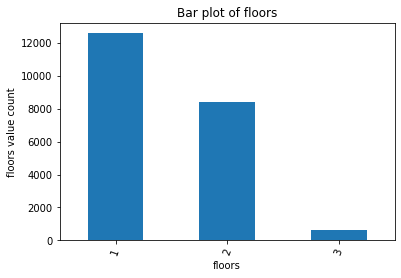

In [27]:
#histogram to show floors value count for each floors
plt.title("Bar plot of floors")
plt.xlabel("floors")
plt.ylabel("floors value count")
vc=df['floors'].value_counts()
vc.plot.bar(rot=70)

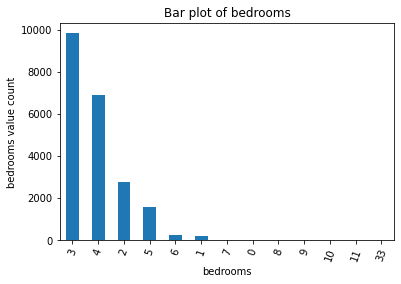

In [28]:
#histogram to show bedrooms value count for each bedrooms
plt.title("Bar plot of bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("bedrooms value count")
vc=df['bedrooms'].value_counts()
vc.plot.bar(rot=70)

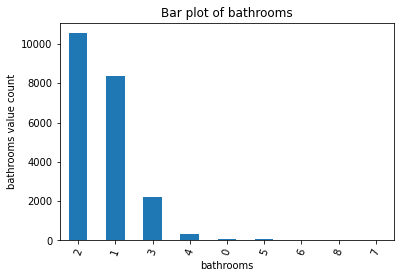

In [29]:
plt.title("Bar plot of bathrooms")
plt.xlabel("bathrooms")
plt.ylabel("bathrooms value count")
vc=df['bathrooms'].value_counts()
vc.plot.bar(rot=70)

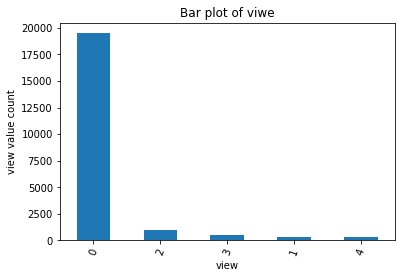

In [30]:
plt.title("Bar plot of viwe")
plt.xlabel("view")
plt.ylabel("view value count")
vc=df['view'].value_counts()
vc.plot.bar(rot=70)

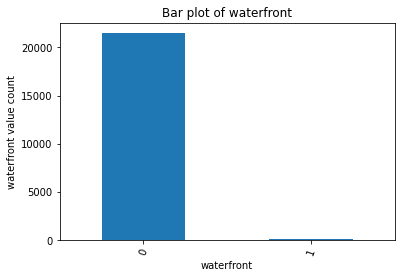

In [31]:
plt.title("Bar plot of waterfront")
plt.xlabel("waterfront")
plt.ylabel("waterfront value count")
vc=df['waterfront'].value_counts()
vc.plot.bar(rot=70)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


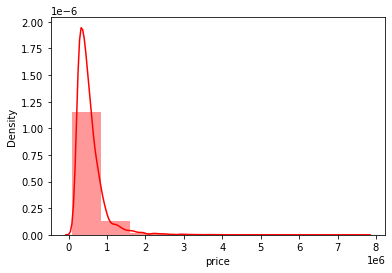

In [32]:
sns.distplot(df['price'],bins=10,hist=True,kde=True,color="red")

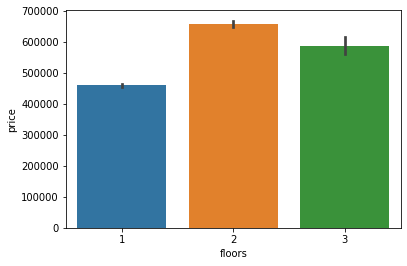

In [33]:
sns.barplot(x='floors', y='price', data = df)

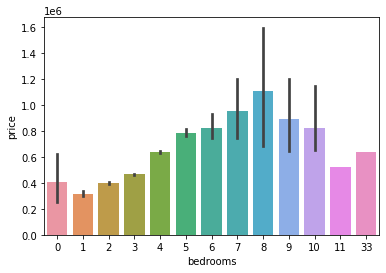

In [34]:
sns.barplot(x='bedrooms', y='price', data = df)

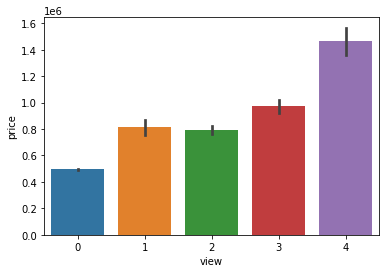

In [35]:
sns.barplot(x='view', y='price', data = df)

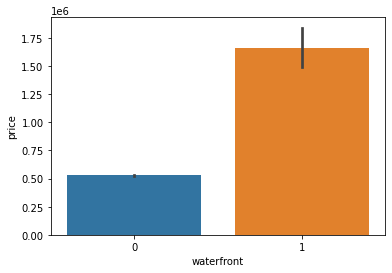

In [36]:
sns.barplot(x='waterfront', y='price', data = df)

In [37]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 21 , 21 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

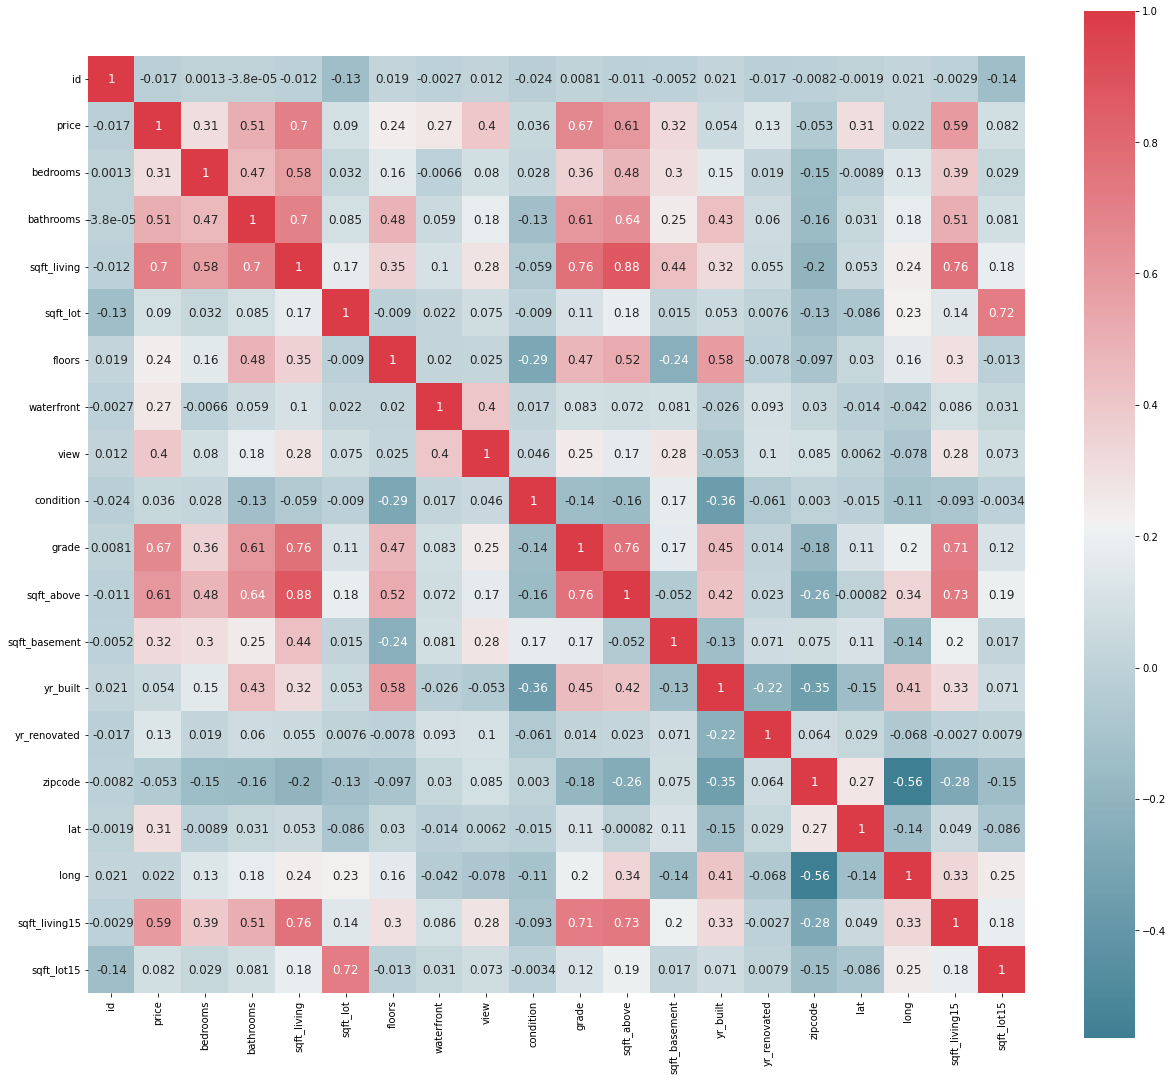

In [38]:
plot_correlation_map(df)

Using the correlation map we can select the most important feature which is sqft_living because of the strong correlation with price which is valued at (0.7).


In [39]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

In [40]:
len(df.loc[df['sqft_living']<1200])

3002

In [41]:
df['sqft_living'].max()

13540

In [42]:
df['sqft_living'].min()

290

In [43]:
len(df.loc[df['sqft_living']>1300])

17459

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


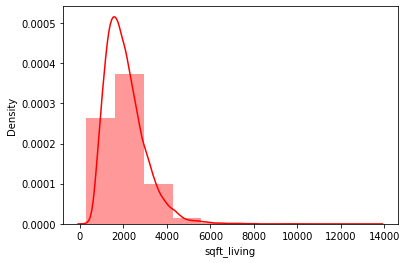

In [44]:
sns.distplot(df['sqft_living'],bins=10,hist=True,kde=True, color="red")

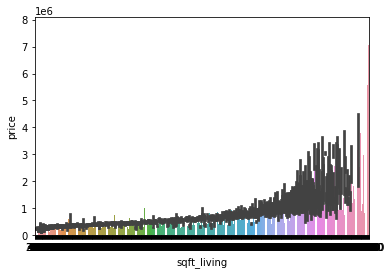

In [45]:
sns.barplot(x='sqft_living', y='price', data = df)

In [46]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

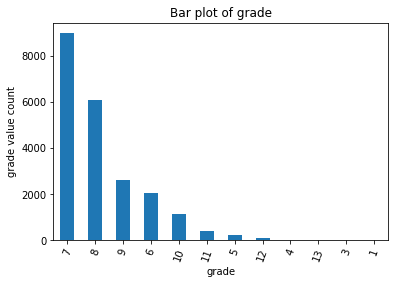

In [47]:
#histogram to show floors value count for each grade
plt.title("Bar plot of grade")
plt.xlabel("grade")
plt.ylabel("grade value count")
vc=df['grade'].value_counts()
vc.plot.bar(rot=70)

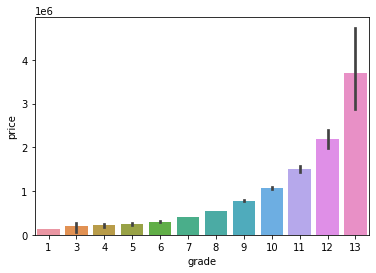

In [48]:
sns.barplot(x='grade', y='price', data = df)

Predict Linear Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [50]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


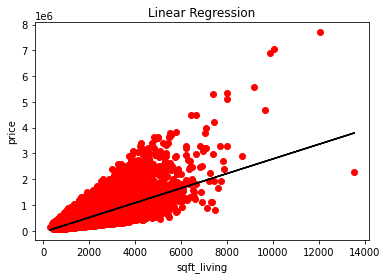

In [51]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [52]:
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = model.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58237063962.54638
R squared:  0.5367625846135381


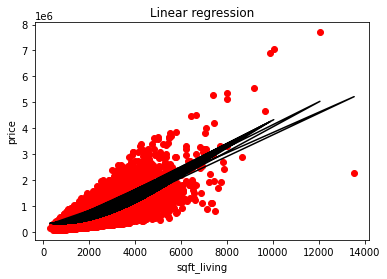

In [53]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, model.predict(poly.fit_transform(x)), color="k") 

predict multi-linear regression


In [54]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [55]:
x=df[["sqft_living","grade"]]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 35%
z=LinearRegression()   #build linear regression model
z.fit(x_train,y_train)  #fitting the training data
predicted=z.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57296260421.90227
R squared 0.54453578542216


In [56]:
poly=PolynomialFeatures(degree=4)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
z.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = z.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  52301997121.22176
R squared:  0.5842366000109221
